In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [27]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [28]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [29]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [30]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [31]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [32]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [33]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [34]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [35]:
df= df.assign(hour = df.pickup_datetime.dt.hour, day= df.pickup_datetime.dt.day, month = df.pickup_datetime.dt.month, year = df.pickup_datetime.dt.year, dayofweek = df.pickup_datetime.dt.dayofweek)
df = df.drop('pickup_datetime',axis=1)

In [36]:
lat = df["pickup_latitude"]-df["dropoff_latitude"]
lon = df["pickup_longitude"]-df["dropoff_longitude"]
lat = lat**2
lon = lon**2
df['distance'] = lat+lon
df['distance'] = df['distance'].apply(lambda x: np.sqrt(x))

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
distance             AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

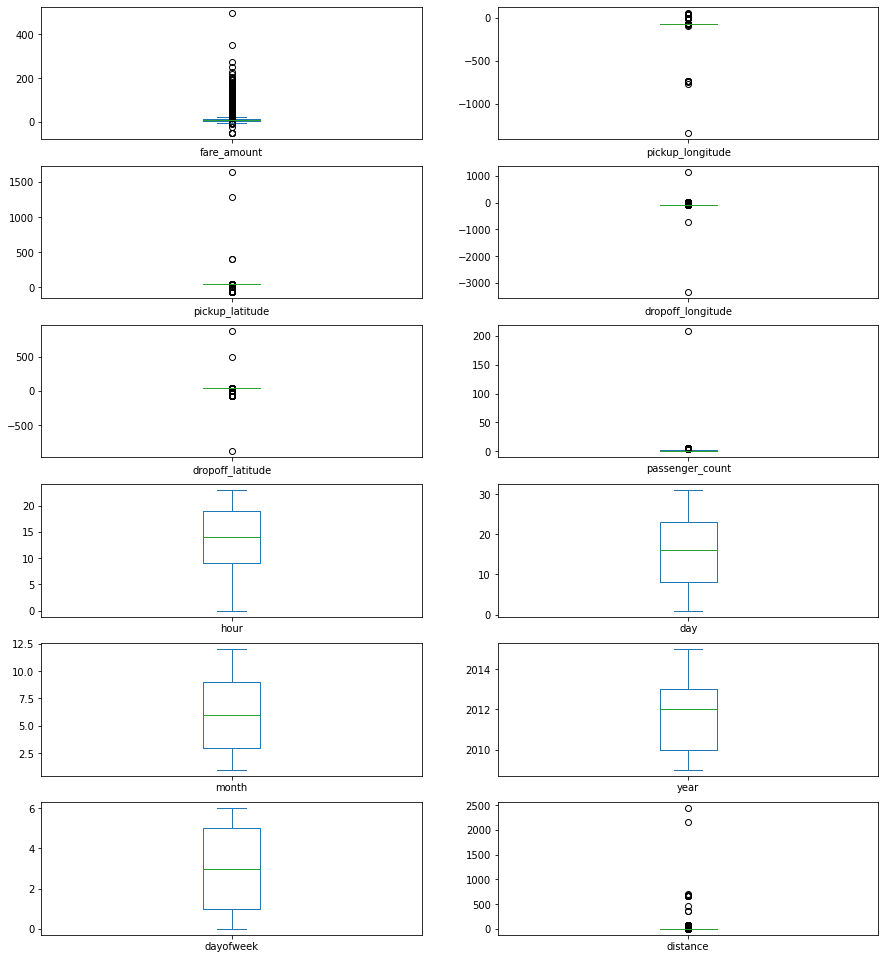

In [37]:
df.plot(kind = "box",subplots=True,layout=(7,2),figsize=(15,20))

In [38]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)
    return df

def outliers_cols(df):
    for i in df:
        df = outliers(df, i)
    return df

df = outliers_cols(df)

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
distance             AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

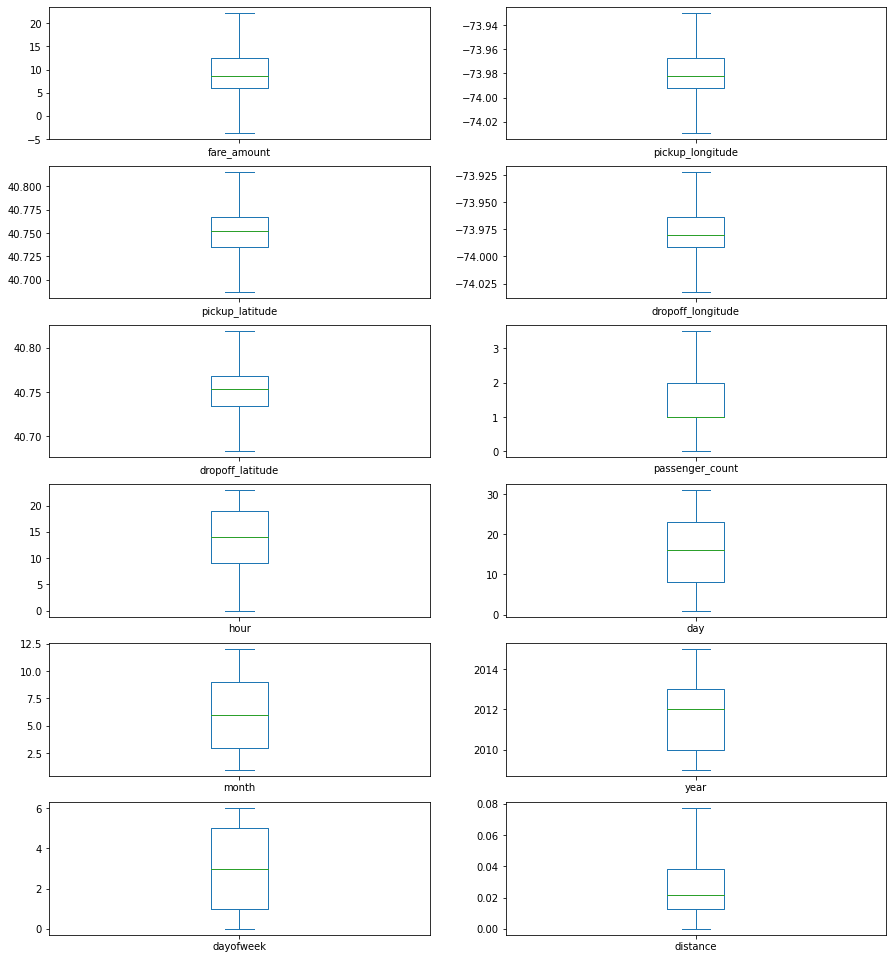

In [39]:
df.plot(kind = "box",subplots=True,layout=(7,2),figsize=(15,20))

In [40]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,0.015140
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,0.022103
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,0.053109
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,0.016528
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,0.051031


In [51]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

print(x,y)

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.999817        40.738354         -73.999512   
1             -73.994355        40.728225         -73.994710   
2             -74.005043        40.740770         -73.962565   
3             -73.976124        40.790844         -73.965316   
4             -73.929786        40.744085         -73.973082   
...                  ...              ...                ...   
199995        -73.987042        40.739367         -73.986525   
199996        -73.984722        40.736837         -74.006672   
199997        -73.986017        40.756487         -73.922036   
199998        -73.997124        40.725452         -73.983215   
199999        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0              40.723217              1.0    19    7      5  2015          3   
1              40.750325              1.0    20   17      7  2009      

In [42]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [43]:
regression = LinearRegression()

In [44]:
regression.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = regression.predict(X_test)

In [46]:
print("R2: ", r2_score(y_true=y_test,y_pred=y_pred))
print("MSE: ", mean_squared_error(y_true=y_test,y_pred=y_pred))
print("MAE: ", mean_absolute_error(y_true=y_test,y_pred=y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred)))

R2:  0.7465352965242176
MSE:  7.551070854957711
MAE:  1.8131223475417477
RMSE:  2.7479211879087275


In [47]:
rfrmodel = RandomForestRegressor(n_estimators=10, random_state=1)

In [48]:
rfrmodel.fit(X_train,y_train)
rfrmodel_pred= rfrmodel.predict(X_test)

In [49]:
print("R2: ", r2_score(y_true=y_test,y_pred=rfrmodel_pred))
print("MSE: ", mean_squared_error(y_true=y_test,y_pred=rfrmodel_pred))
print("MAE: ", mean_absolute_error(y_true=y_test,y_pred=rfrmodel_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_true=y_test,y_pred=rfrmodel_pred)))

R2:  0.7881613680334333
MSE:  6.310971499626146
MAE:  1.5867536673881675
RMSE:  2.5121647039209325
